In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.layers import BatchNormalization,Dropout,Activation,Input,GlobalAveragePooling2D
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
%matplotlib inline

In [2]:
folder_path = "C:/Users/Kannan T/Documents/DATA SET/object detection dataset"
picture_size = 64
batch_size = 32

In [3]:
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.3)

In [4]:
train_set = datagen.flow_from_directory(
    folder_path,
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 3431 images belonging to 3 classes.


In [5]:
validation_set = datagen.flow_from_directory(
    folder_path,
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1469 images belonging to 3 classes.


In [7]:
from keras.optimizers import Adam

In [8]:
no_of_classes = 3
model = Sequential()

model.add(Conv2D(32,(3,3),padding = 'same',input_shape = (64,64,1))) #64 filters and 3 by 3 size
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size = (2,2))) 

#2nd CNN layer
model.add(Conv2D(64,(3,3),padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#model.add(Flatten())
model.add(GlobalAveragePooling2D()) 


#Fully connected 1st layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))


model.add(Dense(no_of_classes, activation='softmax'))


opt = Adam (learning_rate = 0.001) #optimizer
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,035 (109.51 KB)

 Trainable params: 27,779 (108.51 KB)

 Non-trainable params: 256 (1.00 KB)

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

file_path = "object_detection_model.keras"

checkpoint = ModelCheckpoint(filepath = file_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=15,
                          verbose=1,
                          restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)


callbacks_list = [checkpoint, early_stopping,reduce_learningrate]

In [12]:
history = model.fit(
    train_set,  
    epochs=20,
    validation_data=validation_set,  
    callbacks=callbacks_list)

C:\Users\Kannan T\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 11/108 ━━━━━━━━━━━━━━━━━━━━ 54s 563ms/step - accuracy: 0.3799 - loss: 1.1496

C:\Users\Kannan T\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 624ms/step - accuracy: 0.4989 - loss: 0.9813
Epoch 1: val_accuracy improved from -inf to 0.53438, saving model to object_detection_model.keras
108/108 ━━━━━━━━━━━━━━━━━━━━ 110s 967ms/step - accuracy: 0.4995 - loss: 0.9804 - val_accuracy: 0.5344 - val_loss: 1.0618 - learning_rate: 0.0010
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.7314 - loss: 0.6586
Epoch 2: val_accuracy improved from 0.53438 to 0.60654, saving model to object_detection_model.keras
108/108 ━━━━━━━━━━━━━━━━━━━━ 102s 946ms/step - accuracy: 0.7315 - loss: 0.6584 - val_accuracy: 0.6065 - val_loss: 0.9986 - learning_rate: 0.0010
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 624ms/step - accuracy: 0.7513 - loss: 0.5851
Epoch 3: val_accuracy did not improve from 0.60654
108/108 ━━━━━━━━━━━━━━━━━━━━ 103s 952ms/step - accuracy: 0.7514 - loss: 0.5850 - val_accuracy: 0.5623 - val_loss: 0.9338 - learning_rate: 0.0010
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accura

In [13]:
score_clean = model.evaluate(validation_set)

46/46 ━━━━━━━━━━━━━━━━━━━━ 32s 681ms/step - accuracy: 0.8010 - loss: 0.4650


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


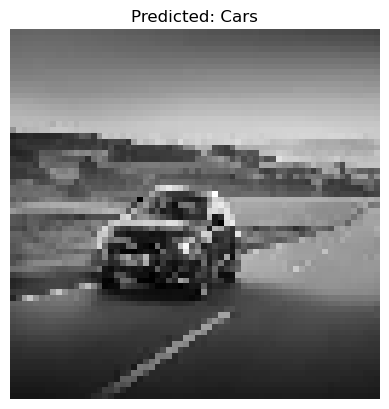

In [14]:
def preprocess_image(image_path, target_size=(64, 64)):
    img = load_img(image_path, target_size=target_size, color_mode='grayscale')
    # Convert the image to an array
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    return img_array

# Function to predict and display the result
def predict_image(image_path, model, class_labels):
    preprocessed_image = preprocess_image(image_path)
    
    prediction = model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    plt.imshow(preprocessed_image[0, :, :, 0], cmap='gray')
    plt.title(f'Predicted: {class_labels[predicted_class]}')
    plt.axis('off')
    plt.show()

class_labels = list(train_set.class_indices.keys())
image_path = 'C:/Users/Kannan T/Documents/DATA SET/object detection dataset/Cars/1343.jpg'
predict_image(image_path, model, class_labels)

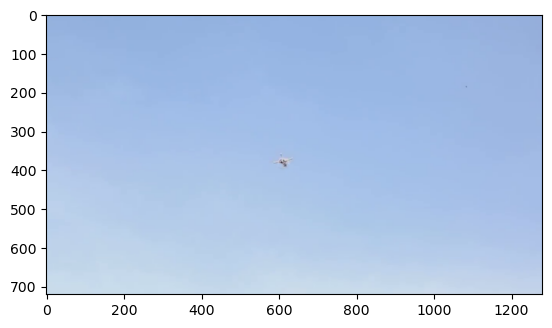

In [5]:
image = cv2.imread('C:/Users/Kannan T/Documents/DATA SET/object detection dataset/Drones/foto07396.jpg')  
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


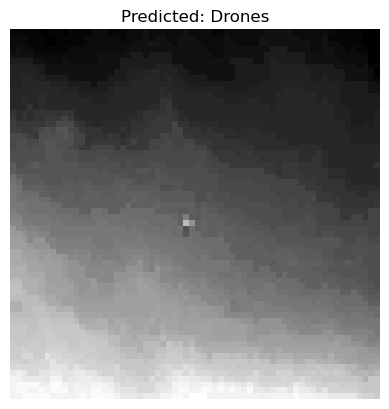

In [4]:
def preprocess_image(image_path, target_size=(64, 64)):
    img = load_img(image_path, target_size=target_size, color_mode='grayscale')
    # Convert the image to an array
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    return img_array

# Function to predict and display the result
def predict_image(image_path, model, class_labels):
    preprocessed_image = preprocess_image(image_path)
    
    prediction = model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    plt.imshow(preprocessed_image[0, :, :, 0], cmap='gray')
    plt.title(f'Predicted: {class_labels[predicted_class]}')
    plt.axis('off')
    plt.show()

model = load_model('C:/Users/Kannan T/Documents/Python/Big Bang Boom/object_detection_model.keras')
class_labels = ['Cars','Drones','Humans']
image_path = 'C:/Users/Kannan T/Documents/DATA SET/object detection dataset/Drones/foto07396.jpg'
predict_image(image_path, model, class_labels)

In [10]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
model = load_model('C:/Users/Kannan T/Documents/Python/Big Bang Boom/object_detection_model.keras')
class_labels = ['Cars', 'Drones', 'Humans']  # Update these labels according to your dataset
# Function to preprocess each frame for prediction
def preprocess_frame(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
    resized = cv2.resize(gray, (64, 64))  
    normalized = resized / 255.0 
    reshaped = np.reshape(normalized, (1, 64, 64, 1))  # Reshape to match model input shape
    return reshaped

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    preprocessed_frame = preprocess_frame(frame)
    # Run prediction
    prediction = model.predict(preprocessed_frame)
    predicted_class = np.argmax(prediction, axis=1)[0]  
    predicted_label = class_labels[predicted_class]  

    cv2.putText(frame, f'Prediction: {predicted_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Object Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━

In [ ]:
from keras.losses import CategoricalCrossentropy
from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import FastGradientMethod
loss_object = CategoricalCrossentropy()
classifier = TensorFlowV2Classifier(
    clip_values=(0, 1),
    model=model,
    nb_classes=3,
    input_shape=(64, 64, 1),
    loss_object=loss_object)

attack_fgsm = FastGradientMethod(estimator=classifier, eps=0.1,batch_size=32)
train_images_adv = attack_fgsm.generate(x=train_set)

In [ ]:
n = len(train_images) // 2
X_train_combined = np.concatenate((train_set[:n], train_images_adv[:n]))

In [ ]:
model.fit(X_train_combined,validation_data=validation_set, epochs=10, batch_size=256, callbacks=callbacks_list)

In [ ]:
Accuracy = model.evaluate(validation_set)